# IEEE Hackathon

### Data Loader

In [339]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os
raw_data = pd.read_csv("states.timeseries.csv")

In [340]:
display(raw_data)

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,unused3,unused4,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered,riskLevels.caseDensity,cdcTransmissionLevel
0,2020-03-01,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
1,2020-03-02,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
2,2020-03-03,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
3,2020-03-04,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
4,2020-03-05,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30850,2021-09-26,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,87866.0,955.0,...,NaN,NaN,0.73,5,0.480,0.412,0.0,513663.0,5,3
30851,2021-09-27,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,88935.0,955.0,...,NaN,NaN,0.69,5,0.481,0.412,0.0,513700.0,5,3
30852,2021-09-28,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,89430.0,996.0,...,NaN,NaN,0.74,5,0.483,0.414,41.0,517584.0,5,3
30853,2021-09-29,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,89965.0,996.0,...,NaN,NaN,0.74,5,0.484,0.415,0.0,519093.0,5,3


In [341]:
mobility_data = pd.read_csv("2021_US_Region_Mobility_Report.csv")
mobility_data = mobility_data[mobility_data.sub_region_2.isnull() & mobility_data.sub_region_1.notnull()]
abbrev = us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
}
mobility_data = mobility_data.replace({"sub_region_1": abbrev})
display(mobility_data)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
269,US,United States,AL,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-01,-44.0,-30.0,-16.0,-46.0,-72.0,26.0
270,US,United States,AL,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-02,-19.0,-8.0,-2.0,-8.0,-19.0,7.0
271,US,United States,AL,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-03,-16.0,-8.0,-7.0,-1.0,-17.0,6.0
272,US,United States,AL,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-04,-5.0,2.0,-9.0,-9.0,-26.0,8.0
273,US,United States,AL,NaN,NaN,US-AL,NaN,ChIJdf5LHzR_hogR6czIUzU0VV4,2021-01-05,-10.0,-1.0,-14.0,-12.0,-25.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696101,US,United States,WY,NaN,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2021-09-22,7.0,4.0,182.0,37.0,-19.0,1.0
696102,US,United States,WY,NaN,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2021-09-23,6.0,6.0,173.0,40.0,-19.0,1.0
696103,US,United States,WY,NaN,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2021-09-24,1.0,3.0,162.0,49.0,-15.0,0.0
696104,US,United States,WY,NaN,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2021-09-25,4.0,3.0,186.0,45.0,-9.0,-1.0


In [342]:
data = pd.merge(raw_data, mobility_data, left_on=['country', 'state', 'date'], right_on=['country_region_code', 'sub_region_1', 'date'], how='inner')
data = data[(data['date'] > '2021-03-01') & (data['date'] < '2021-09-27')]
display(data)

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metro_area,iso_3166_2_code,census_fips_code,place_id,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
60,2021-03-02,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,58383.0,290.0,...,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,-9.0,-3.0,8.0,-26.0,-21.0,8.0
61,2021-03-03,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,58574.0,291.0,...,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,-3.0,1.0,3.0,-18.0,-21.0,8.0
62,2021-03-04,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,58722.0,291.0,...,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,-8.0,-3.0,5.0,-18.0,-23.0,8.0
63,2021-03-05,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,58870.0,292.0,...,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,-9.0,-6.0,5.0,-20.0,-25.0,9.0
64,2021-03-06,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,58870.0,292.0,...,NaN,US-AK,NaN,ChIJG8CuwJzfAFQRNduKqSde27w,-7.0,-1.0,22.0,-12.0,-13.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13445,2021-09-22,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,86594.0,955.0,...,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,7.0,4.0,182.0,37.0,-19.0,1.0
13446,2021-09-23,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,87351.0,955.0,...,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,6.0,6.0,173.0,40.0,-19.0,1.0
13447,2021-09-24,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,87866.0,955.0,...,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,1.0,3.0,162.0,49.0,-15.0,0.0
13448,2021-09-25,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,87866.0,955.0,...,NaN,US-WY,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,4.0,3.0,186.0,45.0,-9.0,-1.0


In [343]:
data.columns

Index(['date', 'country', 'state', 'county', 'fips', 'lat', 'long',
       'locationId', 'actuals.cases', 'actuals.deaths',
       'actuals.positiveTests', 'actuals.negativeTests',
       'actuals.contactTracers', 'actuals.hospitalBeds.capacity',
       'actuals.hospitalBeds.currentUsageTotal',
       'actuals.hospitalBeds.currentUsageCovid', 'unused1',
       'actuals.icuBeds.capacity', 'actuals.icuBeds.currentUsageTotal',
       'actuals.icuBeds.currentUsageCovid', 'unused2', 'actuals.newCases',
       'actuals.vaccinesDistributed', 'actuals.vaccinationsInitiated',
       'actuals.vaccinationsCompleted', 'metrics.testPositivityRatio',
       'metrics.testPositivityRatioDetails', 'metrics.caseDensity',
       'metrics.contactTracerCapacityRatio', 'metrics.infectionRate',
       'metrics.infectionRateCI90', 'unused3', 'unused4',
       'metrics.icuCapacityRatio', 'riskLevels.overall',
       'metrics.vaccinationsInitiatedRatio',
       'metrics.vaccinationsCompletedRatio', 'actuals.new

In [344]:
data = data[['date', 'country', 'state', 'actuals.positiveTests', 'actuals.negativeTests',  'actuals.contactTracers', 'actuals.hospitalBeds.capacity',
       'actuals.newCases', 'actuals.vaccinesDistributed',
       'actuals.vaccinationsInitiated', 'actuals.vaccinationsCompleted',
       'metrics.testPositivityRatio',
       'metrics.caseDensity', 
       'metrics.infectionRate', 'metrics.infectionRateCI90',
       'riskLevels.overall',
       'metrics.vaccinationsInitiatedRatio',
       'metrics.vaccinationsCompletedRatio', 'actuals.newDeaths',
       'actuals.vaccinesAdministered', 'riskLevels.caseDensity', 'cdcTransmissionLevel', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']]

In [345]:
print (data.isna().any(axis=0))

date                                                  False
country                                               False
state                                                 False
actuals.positiveTests                                  True
actuals.negativeTests                                  True
actuals.contactTracers                                False
actuals.hospitalBeds.capacity                         False
actuals.newCases                                       True
actuals.vaccinesDistributed                            True
actuals.vaccinationsInitiated                          True
actuals.vaccinationsCompleted                          True
metrics.testPositivityRatio                            True
metrics.caseDensity                                    True
metrics.infectionRate                                 False
metrics.infectionRateCI90                             False
riskLevels.overall                                    False
metrics.vaccinationsInitiatedRatio      

In [346]:
print(data[data['metrics.testPositivityRatio'].isna()])

             date country state  actuals.positiveTests  actuals.negativeTests  \
537    2021-09-26      US    AL                    NaN                    NaN   
1341   2021-09-23      US    CA                    NaN                    NaN   
1342   2021-09-24      US    CA                    NaN                    NaN   
1343   2021-09-25      US    CA                    NaN                    NaN   
1344   2021-09-26      US    CA                    NaN                    NaN   
...           ...     ...   ...                    ...                    ...   
12638  2021-09-22      US    WA                    NaN                    NaN   
12639  2021-09-23      US    WA                    NaN                    NaN   
12640  2021-09-24      US    WA                    NaN                    NaN   
12641  2021-09-25      US    WA                    NaN                    NaN   
12642  2021-09-26      US    WA                    NaN                    NaN   

       actuals.contactTrace

In [347]:
data['actuals.newCases'] = data['actuals.newCases'].fillna(method='bfill')
data['metrics.testPositivityRatio'] = data['metrics.testPositivityRatio'].fillna(method='bfill')

In [348]:
data = data.fillna(0)
# data = data.drop(['country', 'state'], axis=1)
data = data.set_index('date')

In [349]:
data

,country,state,actuals.positiveTests,actuals.negativeTests,actuals.contactTracers,actuals.hospitalBeds.capacity,actuals.newCases,actuals.vaccinesDistributed,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,...,actuals.newDeaths,actuals.vaccinesAdministered,riskLevels.caseDensity,cdcTransmissionLevel,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,,,,,,,,
2021-03-02,US,AK,99278.0,1758127.0,235.0,1620.0,154.0,372725.0,168646.0,100902.0,...,1.0,269941.0,2,3,-9.0,-3.0,8.0,-26.0,-21.0,8.0
2021-03-03,US,AK,99429.0,1765632.0,235.0,1683.0,191.0,399225.0,170586.0,102382.0,...,1.0,273350.0,2,3,-3.0,1.0,3.0,-18.0,-21.0,8.0
2021-03-04,US,AK,99603.0,1773776.0,235.0,1686.0,148.0,409125.0,172414.0,104129.0,...,0.0,276891.0,2,3,-8.0,-3.0,5.0,-18.0,-23.0,8.0
2021-03-05,US,AK,99736.0,1781326.0,235.0,1678.0,148.0,421375.0,174588.0,106558.0,...,1.0,281467.0,2,3,-9.0,-6.0,5.0,-20.0,-25.0,9.0
2021-03-06,US,AK,99864.0,1785962.0,235.0,1711.0,0.0,426715.0,178237.0,110053.0,...,0.0,288625.0,2,3,-7.0,-1.0,22.0,-12.0,-13.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-22,US,WY,69972.0,922181.0,50.0,1743.0,542.0,645805.0,276824.0,236785.0,...,0.0,511047.0,5,3,7.0,4.0,182.0,37.0,-19.0,1.0
2021-09-23,US,WY,70285.0,925416.0,50.0,1743.0,757.0,648605.0,277385.0,237374.0,...,0.0,512233.0,5,3,6.0,6.0,173.0,40.0,-19.0,1.0
2021-09-24,US,WY,70647.0,928304.0,50.0,1746.0,515.0,653265.0,277518.0,237495.0,...,0.0,512395.0,5,3,1.0,3.0,162.0,49.0,-15.0,0.0


In [350]:
state_data = dict()
for i in abbrev.values():
    state_data[i] = dict()
    new_data = data[data['state'] == i]
    new_data = new_data.drop(['country', 'state'], axis=1)
    new_data.loc['2021-09-27'] = 0
    new_data.loc['2021-09-28'] = 0
    new_data.loc['2021-09-29'] = 0
    new_data.loc['2021-09-30'] = 0
    new_data.loc['2021-10-01'] = 0
    new_data.loc['2021-10-02'] = 0
    new_data.loc['2021-10-03'] = 0
    state_data[i]['df'] = new_data
old_data = data

In [351]:
for j in abbrev.values():
    train, test = state_data[j]['df'][0:int(state_data[j]['df'].shape[0] * .75)].copy(), state_data[j]['df'][int(state_data[j]['df'].shape[0] * .75):].copy()
    scalers={}
    for i in train.columns:
        scaler = MinMaxScaler(feature_range=(-1,1))
        s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
        s_s = np.reshape(s_s,len(s_s))
        scalers['scaler_' + i] = scaler
        train[i]=s_s
    for i in train.columns:
        scaler = scalers['scaler_' + i]
        s_s = scaler.transform(test[i].values.reshape(-1,1))
        s_s=np.reshape(s_s,len(s_s))
        scalers['scaler_'+i] = scaler
        test[i]=s_s
    state_data[j]['scalers'] = scalers
    state_data[j]['train'] = train
    state_data[j]['test'] = test
    #print(train.shape)
    #print(test.shape)

In [352]:
print(state_data['AL']['df'].columns)

Index(['actuals.positiveTests', 'actuals.negativeTests',
       'actuals.contactTracers', 'actuals.hospitalBeds.capacity',
       'actuals.newCases', 'actuals.vaccinesDistributed',
       'actuals.vaccinationsInitiated', 'actuals.vaccinationsCompleted',
       'metrics.testPositivityRatio', 'metrics.caseDensity',
       'metrics.infectionRate', 'metrics.infectionRateCI90',
       'riskLevels.overall', 'metrics.vaccinationsInitiatedRatio',
       'metrics.vaccinationsCompletedRatio', 'actuals.newDeaths',
       'actuals.vaccinesAdministered', 'riskLevels.caseDensity',
       'cdcTransmissionLevel',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')


In [353]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    future = future[:, [4, 8]]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [354]:
n_past = 30
n_future = 7 
n_features = 25

In [355]:
for i in abbrev.values():
    X_train, y_train = split_series(state_data[i]['train'].values,n_past, n_future)
    X_train = X_train.reshape((X_train.shape[0], n_past, n_features))
    X_test, y_test = split_series(state_data[i]['test'].values,n_past, n_future)
    X_test = X_test.reshape((X_test.shape[0], n_past, n_features))
    state_data[i]['X_train'] = X_train
    state_data[i]['y_train'] = y_train
    state_data[i]['X_test'] = X_test
    state_data[i]['y_test'] = y_test
    #print(X_train.shape)
    #print(y_train.shape)
    #print(X_test.shape)
    #print(y_test.shape)

In [356]:
print(state_data['AL']['y_train'].shape)

(126, 7, 2)


Model AL
Model AK
Model AZ
Model AR
Model CA
Model CO
Model CT
Model DE
Model FL
Model GA


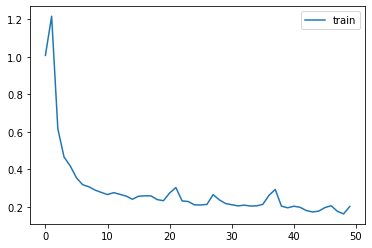

Model HI
Model ID
Model IL
Model IN
Model IA
Model KS
Model KY
Model LA
Model ME
Model MD
Model MA
Model MI
Model MN
Model MS
Model MO
Model MT
Model NE
Model NV
Model NH
Model NJ
Model NM
Model NY
Model NC
Model ND
Model OH
Model OK
Model OR
Model PA
Model RI
Model SC
Model SD
Model TN
Model TX
Model UT
Model VT
Model VA
Model WA
Model WV
Model WI
Model WY


In [369]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras import Model
for i in abbrev.values():
    print("Model " + i)
    X_train = state_data[i]['X_train']
    y_train = state_data[i]['y_train']
    y_train1 = y_train[:, :, 0]
    y_train1 = y_train1.reshape((y_train1.shape[0], y_train1.shape[1]))
    y_train2 = y_train[:, :, 1]
    y_train2 = y_train2.reshape((y_train2.shape[0], y_train2.shape[1]))
    X_test = state_data[i]['X_test']
    y_test = state_data[i]['y_test']
    y_test1 = y_test[:, :, 0]
    y_test1 = y_test1.reshape((y_test1.shape[0], y_test1.shape[1]))
    y_test2 = y_test[:, :, 1]
    y_test2 = y_test2.reshape((y_test2.shape[0], y_test2.shape[1]))
    inp = Input((X_train.shape[1], X_train.shape[2]))
    x = LSTM(100, return_sequences = True) (inp)
    x = Dropout(.5)(x)
    x = Flatten()(x)
    out1 = Dense(7)(x)
    out2 = Dense(7)(x)
    model = Model(inputs =inp,outputs= (out1,out2))
    model.compile(loss='mae', optimizer='adam')
    history = model.fit(X_train, [y_train1, y_train2], epochs=50, batch_size=25, verbose=0, shuffle=False)
    if i == 'GA':
        plt.plot(history.history['loss'], label='train')
        plt.legend()
        plt.show()
    state_data[i]['model'] = model
    state_data[i]['y_train1'] = y_train1
    state_data[i]['y_train2'] = y_train2
    state_data[i]['y_test1'] = y_test1
    state_data[i]['y_test2'] = y_test2

In [370]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
for i in abbrev.values():
    print(i)
    model = state_data[i]['model']
    X_test = state_data[i]['X_test']
    y_test1 = state_data[i]['y_test1']
    y_test2 = state_data[i]['y_test2']
    scalers = state_data[i]['scalers']
    scaler1 = scalers['scaler_actuals.newCases']
    scaler2 = scalers['scaler_metrics.testPositivityRatio']
    
    pred1, pred2 = model.predict(X_test)
    pred1 = scaler1.inverse_transform(pred1)
    pred2 = scaler2.inverse_transform(pred2)
    y_test1_scaled = scaler1.inverse_transform(y_test1)
    y_test2_scaled = scaler2.inverse_transform(y_test2)
    # print(pred2)
    state_data[i]['pred1'] = pred1
    state_data[i]['pred2'] = pred2
    state_data[i]['y_test1_scaled'] = y_test1_scaled
    state_data[i]['y_test2_scaled'] = y_test2_scaled

AL
AK
AZ
AR
CA
CO
CT
DE
FL
GA
HI
ID
IL
IN
IA
KS
KY
LA
ME
MD
MA
MI
MN
MS
MO
MT
NE
NV
NH
NJ
NM
NY
NC
ND
OH
OK
OR
PA
RI
SC
SD
TN
TX
UT
VT
VA
WA
WV
WI
WY


In [371]:
print(state_data['AL']['df']['actuals.positiveTests'])

date
2021-03-02    512150.0
2021-03-03    512794.0
2021-03-04    513247.0
2021-03-05    513821.0
2021-03-06    514144.0
                ...   
2021-09-29         0.0
2021-09-30         0.0
2021-10-01         0.0
2021-10-02         0.0
2021-10-03         0.0
Name: actuals.positiveTests, Length: 216, dtype: float64


In [372]:
# Predict New Cases and New Positivity Ratio
# Note: 09-22-2021 is the latest date for positive/negative tests for estimation purposes of test totals
newCases = np.zeros((7, 1))
positivityRatio = np.zeros((7, 1))
totalTests = 0
for i in abbrev.values():
    df = state_data[i]['df']
    X_test = state_data[i]['X_test']
    newCases = newCases + state_data[i]['pred1'][len(state_data[i]['pred1']) - 1].reshape((7, 1))
    newRatio = state_data[i]['pred2'][len(state_data[i]['pred2']) - 1].reshape((7, 1))
    if i != 'WA':
        newRatio = newRatio * (df['actuals.positiveTests'].loc['2021-09-22'] + df['actuals.negativeTests'].loc['2021-09-22'])
        totalTests += (df['actuals.positiveTests'].loc['2021-09-22'] + df['actuals.negativeTests'].loc['2021-09-22']) * 7
    else:
        # Washington's Testing data is out of date - need to manually insert test totals form 08/22/2021
        newRatio = newRatio * (384829 + 7161296)
        totalTests += (384829 + 7161296) * 7
    #if df['actuals.positiveTests'].loc['2021-09-22'] < 1 or df['actuals.negativeTests'].loc['2021-09-22'] < 1:
       # print(i)
        
    positivityRatio = positivityRatio + newRatio
positivityRatio = positivityRatio / totalTests
newCases = newCases.astype(int)
print(newCases)
print(positivityRatio)
    

[[160440]
 [158889]
 [184025]
 [116708]
 [107957]
 [166170]
 [134532]]
[[0.00967954]
 [0.00950983]
 [0.00936773]
 [0.00899571]
 [0.00862225]
 [0.00830869]
 [0.00810194]]


In [373]:
#Predict 7 day averages of new cases and positivity
newCases = np.zeros((7, 1))
positivityRatio = np.zeros((7, 1))
totalTests = 0
for i in abbrev.values():
    df = state_data[i]['df']
    X_test = state_data[i]['X_test']
    cases = state_data[i]['pred1'][len(state_data[i]['pred1']) - 7 :]
    cases = np.mean(cases, axis=1).reshape((7, 1))
    newCases = newCases + cases
    
    newRatio = state_data[i]['pred2'][len(state_data[i]['pred2']) - 7 :]
    if i != 'WA':
        newRatio = newRatio * (df['actuals.positiveTests'].loc['2021-09-22'] + df['actuals.negativeTests'].loc['2021-09-22'])
        totalTests += (df['actuals.positiveTests'].loc['2021-09-22'] + df['actuals.negativeTests'].loc['2021-09-22']) * 7
    else:
        # Washington's Testing data is out of date - need to manually insert test totals form 08/22/2021
        newRatio = newRatio * (384829 + 7161296)
        totalTests += (384829 + 7161296) * 7
    newRatio = np.mean(newRatio, axis=1).reshape((7, 1))
    positivityRatio = positivityRatio + newRatio
positivityRatio = positivityRatio / totalTests
newCases = newCases.astype(int)
print(newCases)
print(positivityRatio)

[[157075]
 [156345]
 [154851]
 [151548]
 [149960]
 [149054]
 [146960]]
[[0.00959078]
 [0.00945903]
 [0.00937995]
 [0.00921344]
 [0.00907538]
 [0.00906429]
 [0.00894081]]


In [374]:
#4 Week predictions
total_cases = None
total_actual_cases = None
total_ratios = None
total_actual_ratios = None
for i in abbrev.values():
    df = state_data[i]['df']
    X_test = state_data[i]['X_test']
    y_test1_scaled = state_data[i]['y_test1_scaled']
    y_test2_scaled = state_data[i]['y_test2_scaled']
    pred1 = state_data[i]['pred1']
    pred2 = state_data[i]['pred2']
    
    cases = pred1[[len(pred1) - j for j in range (7, 29, 7)], :]
    actualCases = y_test1_scaled[[len(y_test1_scaled) - j for j in range (7, 29, 7)], :]
    ratios = pred2[[len(pred2) - j for j in range (7, 29, 7)], :]
    actualRatios = y_test2_scaled[[len(y_test2_scaled) - j for j in range (7, 29, 7)], :]
    
    if total_cases is None and total_ratios is None:
        total_cases = cases
        total_actual_cases = actualCases
        total_ratios = ratios
        total_actual_ratios = actualRatios
    else:
        total_cases = np.concatenate((total_cases, cases), axis=0)
        total_actual_cases = np.concatenate((total_actual_cases, actualCases), axis=0)
        total_ratios = np.concatenate((total_ratios, ratios), axis=0)
        total_actual_ratios = np.concatenate((total_actual_ratios, actualRatios), axis=0)

rmse_cases = sqrt(mean_squared_error(total_actual_cases, total_cases))
rmse_positivity = sqrt(mean_squared_error(total_actual_ratios, total_ratios))
mae_cases = mean_absolute_error(total_actual_cases, total_cases)
mae_positivity = mean_absolute_error(total_actual_ratios, total_ratios)

    
    
print('Cases RMSE: %.3f' % rmse_cases)
print('Test Positivity RMSE: %.3f' % rmse_positivity)
print('Cases MAE: %.3f' % mae_cases)
print('Positivity MAE: %.3f' % mae_positivity)
   

Cases RMSE: 4934.855
Test Positivity RMSE: 0.056
Cases MAE: 2689.148
Positivity MAE: 0.040
